In [1]:
import pandas as pd

In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test=pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# finding how many missing values are there in the datasets

missing_values=(df_train.isnull().sum()/len(df_train))*100
missing_values=missing_values[missing_values>0]
missing_values.sort_values()

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [6]:
#now let us find out distribution of salesprice column
import seaborn as sb

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


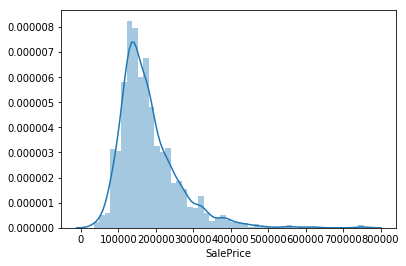

In [7]:
sb.distplot(df_train['SalePrice'])

In [8]:
#it is a right skewed data(tail is more towards right)

In [9]:
#we know ml model works more fine on normally distributed data
#lets apply log to salesprice so that it will become normal

import numpy as np


C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


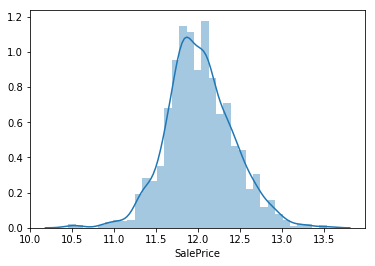

In [10]:
target=np.log(df_train['SalePrice'])
sb.distplot(target)

In [11]:
#finding number of numeric as well as categorical data
numeric_data=df_train.select_dtypes(include=[np.number])
categorical_data=df_train.select_dtypes(exclude=[np.number])
print(numeric_data.shape[1])
print(categorical_data.shape[1])

38
43


In [12]:
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
#correlation data for numerical values
#remove id columns from numeric data

In [14]:
#del numeric_data['Id']

In [15]:
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

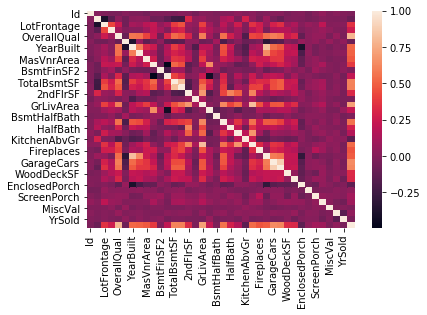

In [16]:
#now finding the correlation
corr=numeric_data.corr()
sb.heatmap(corr)

In [17]:
# we are more related with upper half or lower half of triangle. Focus on light colored squares it will show the correlation

In [18]:
#now we are moving towards finding correlation between categorical data using ALOHA technique

In [19]:
#again some exploratory data analysis

import matplotlib.pyplot as plt
%matplotlib inline


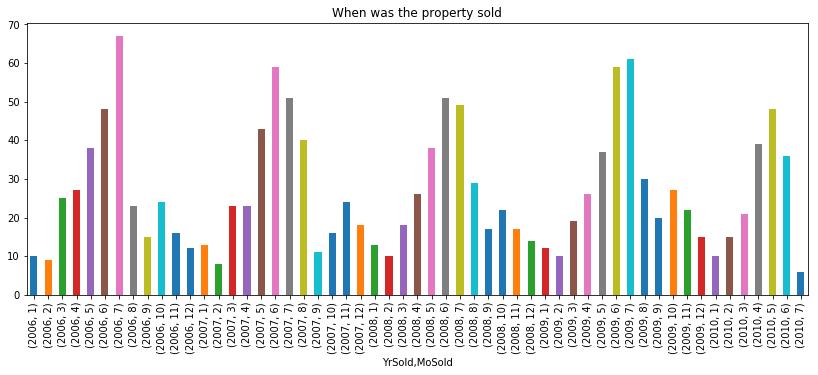

In [20]:
df_train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar',figsize=(14,5))
plt.title('When was the property sold')
plt.show()

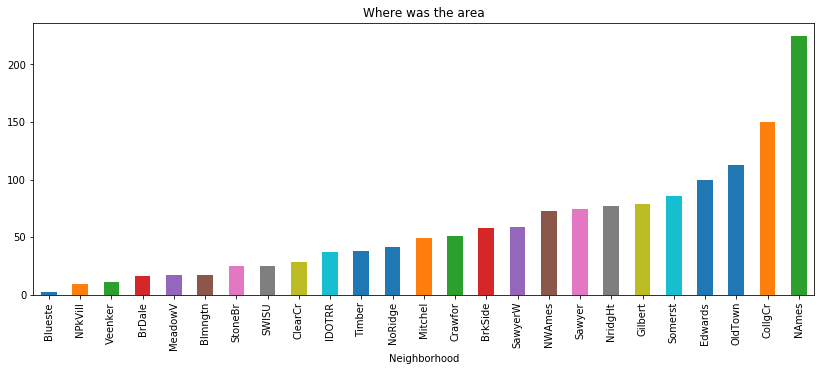

In [21]:
# where are the property located
df_train.groupby(['Neighborhood']).Id.count().sort_values().plot(kind='bar',figsize=(14,5))
plt.title('Where was the area')
plt.show()


In [22]:
#now let us go to the distribution of numerical features

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarni

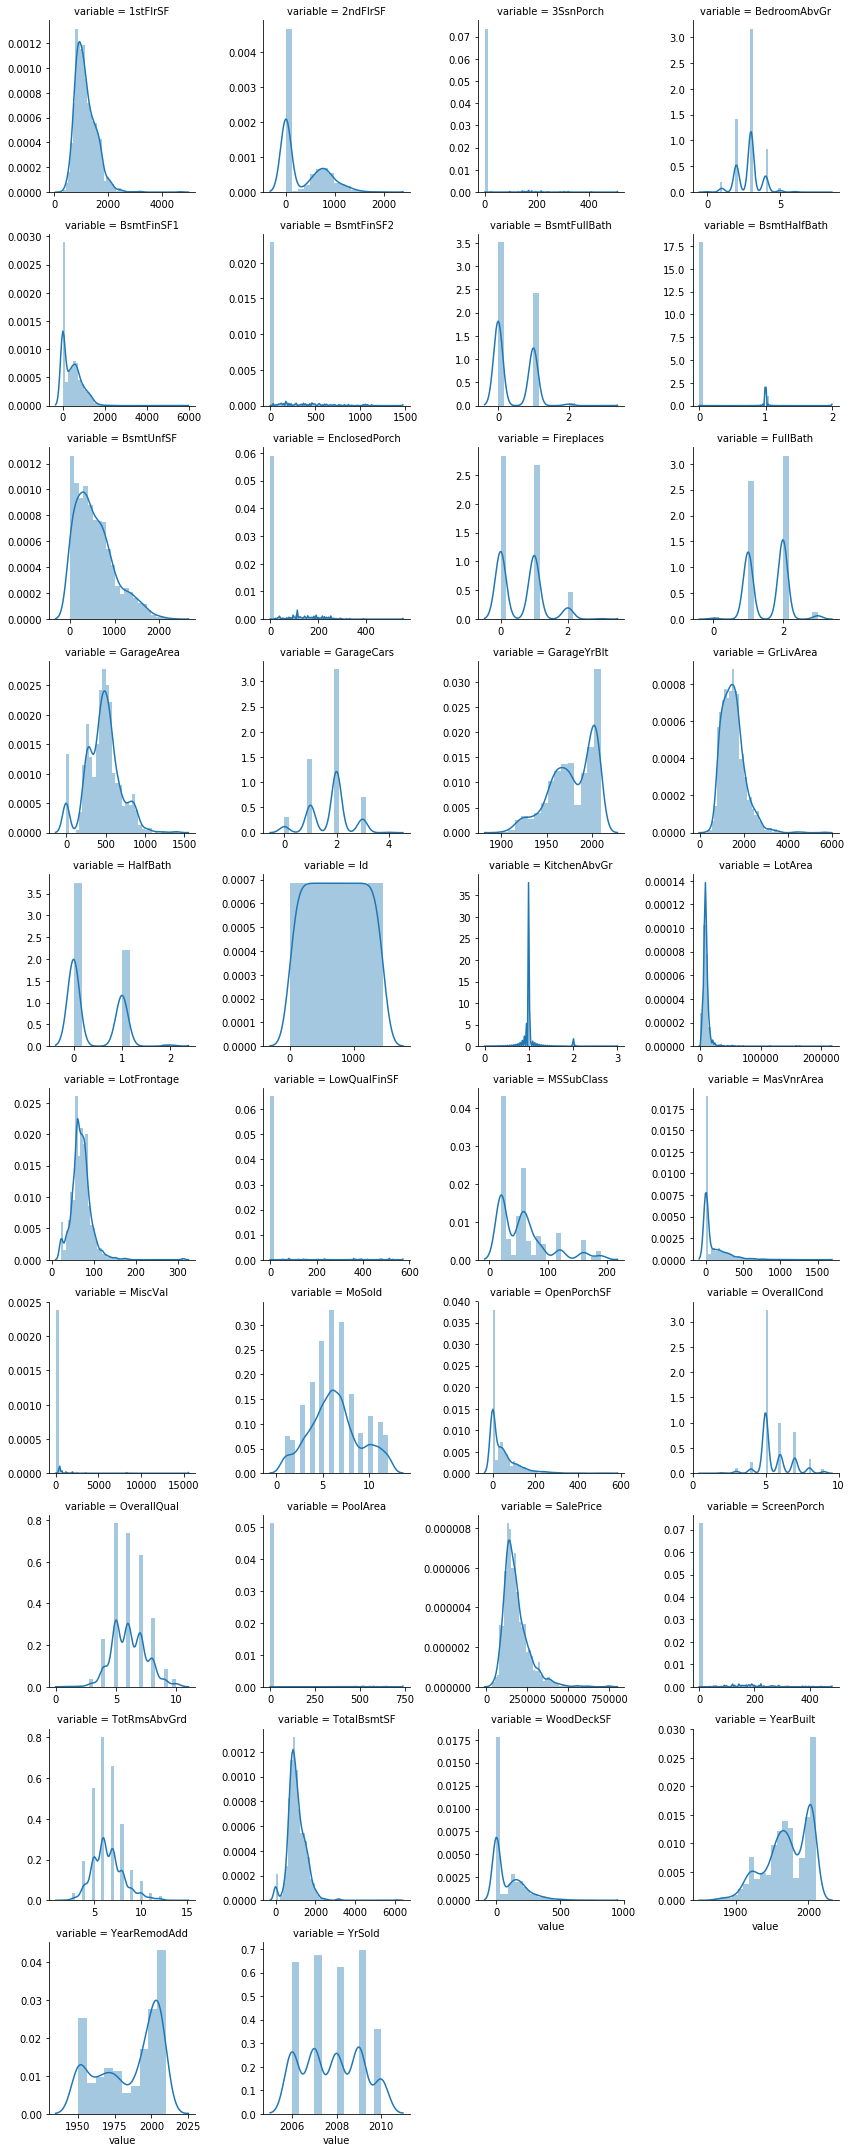

In [23]:
f=pd.melt(df_train,value_vars=sorted(numeric_data))
g=sb.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
g=g.map(sb.distplot,'value')

In [24]:
#these all are meant to be continuous value,but bars indicate they are discrite one, they are not like numerical they are act as a categorical one. lets convert them back from numerical to categorical one.

In [25]:
#conversion from numerical feature to categorical one

df_train['MSSubClass']=df_train.MSSubClass.apply(lambda x:str(x))
df_train['MoSold']=df_train.MoSold.apply(lambda x:str(x))
df_train['YrSold']=df_train.YrSold.apply(lambda x:str(x))

In [26]:
numeric_data=df_train.select_dtypes(include=[np.number])
categorical_data=df_train.select_dtypes(exclude=[np.number])
print(numeric_data.shape[1])
print(categorical_data.shape[1])

35
46


In [27]:
#change in above

In [28]:
#lets plot count for categorical data

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


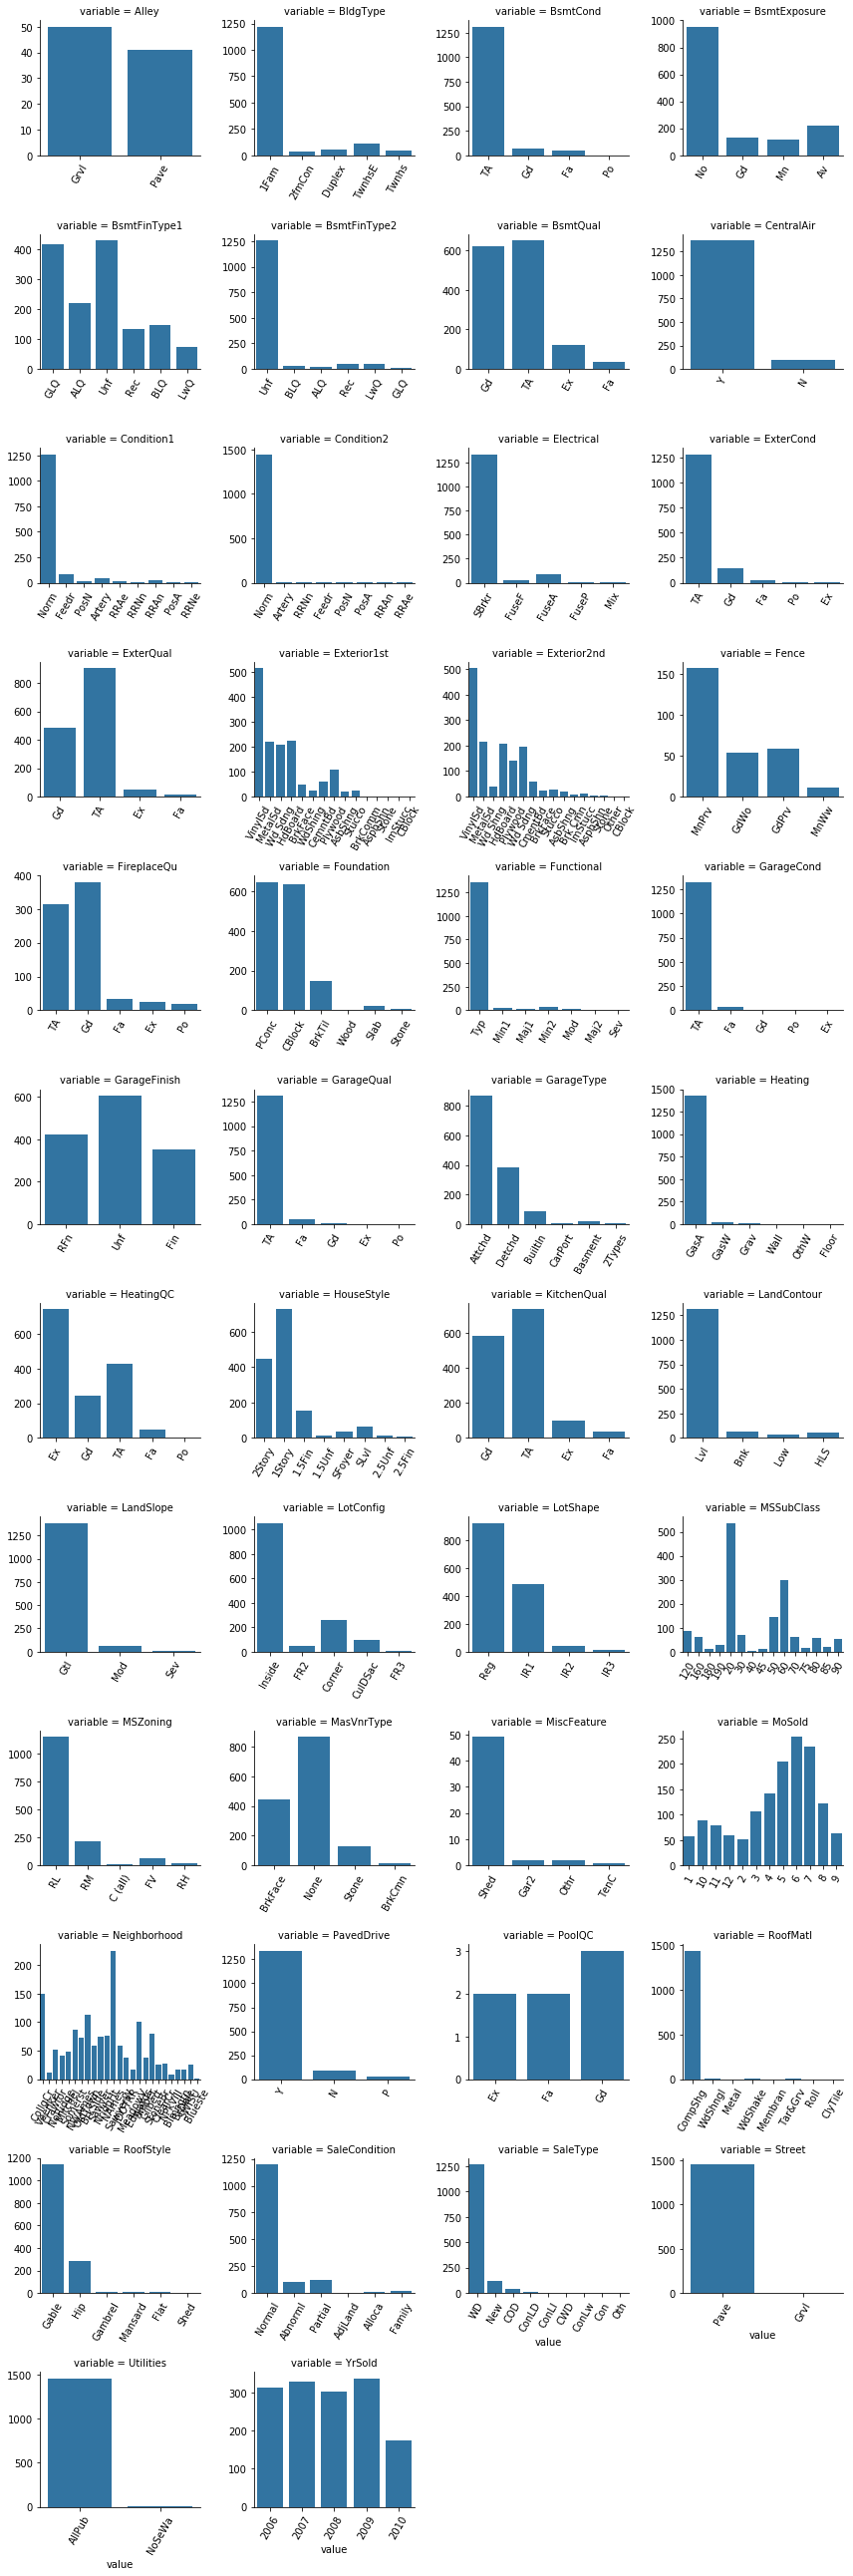

In [29]:
f=pd.melt(df_train,value_vars=sorted(categorical_data))
g=sb.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
plt.xticks(rotation='vertical')
g=g.map(sb.countplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [30]:
df_train.Alley.replace({'Grvl':1,'Pave':2},inplace=True)

In [31]:
df_train.LotShape.replace({'Reg':1,'IR1':2,'IR2':3,'IR3':4},inplace=True)
#df_train.BldgType.replace({'1Fam':1,'2fmCon':2,'Duplex':3,'TwnhsE':4,'Twnhs':5},inplace=True)
df_train.LandContour.replace({'Lvl':1,'Bnk':2,'Low':3,'HLS':4},inplace=True)
df_train.Utilities.replace({'AllPub':1,'NoSeWa':2},inplace=True)
df_train.LandSlope.replace({'Gtl':1,'Mod':2,'Sev':3},inplace=True)
#df_train.Alley.replace({'Grv1':1,'Pave':2},inplace=True)
df_train.ExterQual.replace({'Gd':1,'TA':2,'Ex':3,'Fa':4},inplace=True)
df_train.ExterCond.replace({'TA':1,'Gd':2,'Fa':3,'Po':4,'Ex':5},inplace=True)
df_train.BsmtCond.replace({'TA':1,'Gd':2,'Mn':3,'Av':4},inplace=True)
df_train.BsmtExposure.replace({'No':1,'Gd':2,'Mn':3,'Av':4},inplace=True)
df_train.BsmtFinType1.replace({'GLQ':1,'ALQ':2,'Unf':3,'Rec':4,'BLQ':5,'LwQ':6},inplace=True)
df_train.BsmtFinType2.replace({'Unf':1,'BLQ':2,'ALQ':3,'Rec':4,'LwQ':5,'GLQ':6},inplace=True)
df_train.HeatingQC.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5},inplace=True)
df_train.KitchenQual.replace({'Gd':1,'TA':2,'Ex':3,'Fa':4},inplace=True)
df_train.Functional.replace({'Typ':1,'Min1':2,'Maj1':3,'Min2':4,'Mod':5,'Maj2':6,'Sev':7},inplace=True)
df_train.FireplaceQu.replace({'TA':1,'Gd':2,'Fa':3,'Ex':4,'Po':5},inplace=True)
df_train.GarageFinish.replace({'RFn':1,'Unf':2,'fin':3},inplace=True)
df_train.GarageQual.replace({'TA':1,'Fa':2,'Gd':3,'Ex':4,'Po':5},inplace=True)
df_train.GarageCond.replace({'TA':1,'Fa':2,'Gd':3,'Po':4,'Ex':5},inplace=True)
df_train.PavedDrive.replace({'Y':1,'N':2,'p':3},inplace=True)
df_train.PoolQC.replace({'Ex':1,'Fa':2,'Gd':3},inplace=True)


In [32]:
cat_num_features=['Alley','LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond','BsmtCond',
                 'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
                 'GarageCond','PavedDrive','PoolQC']

df_train[cat_num_features]=df_train[cat_num_features].fillna(0)

In [33]:
#around 24 categorical features are still there we can change them using ALOHA

In [34]:
#box plot to analyze the means of categorical features
#null hypothesis

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


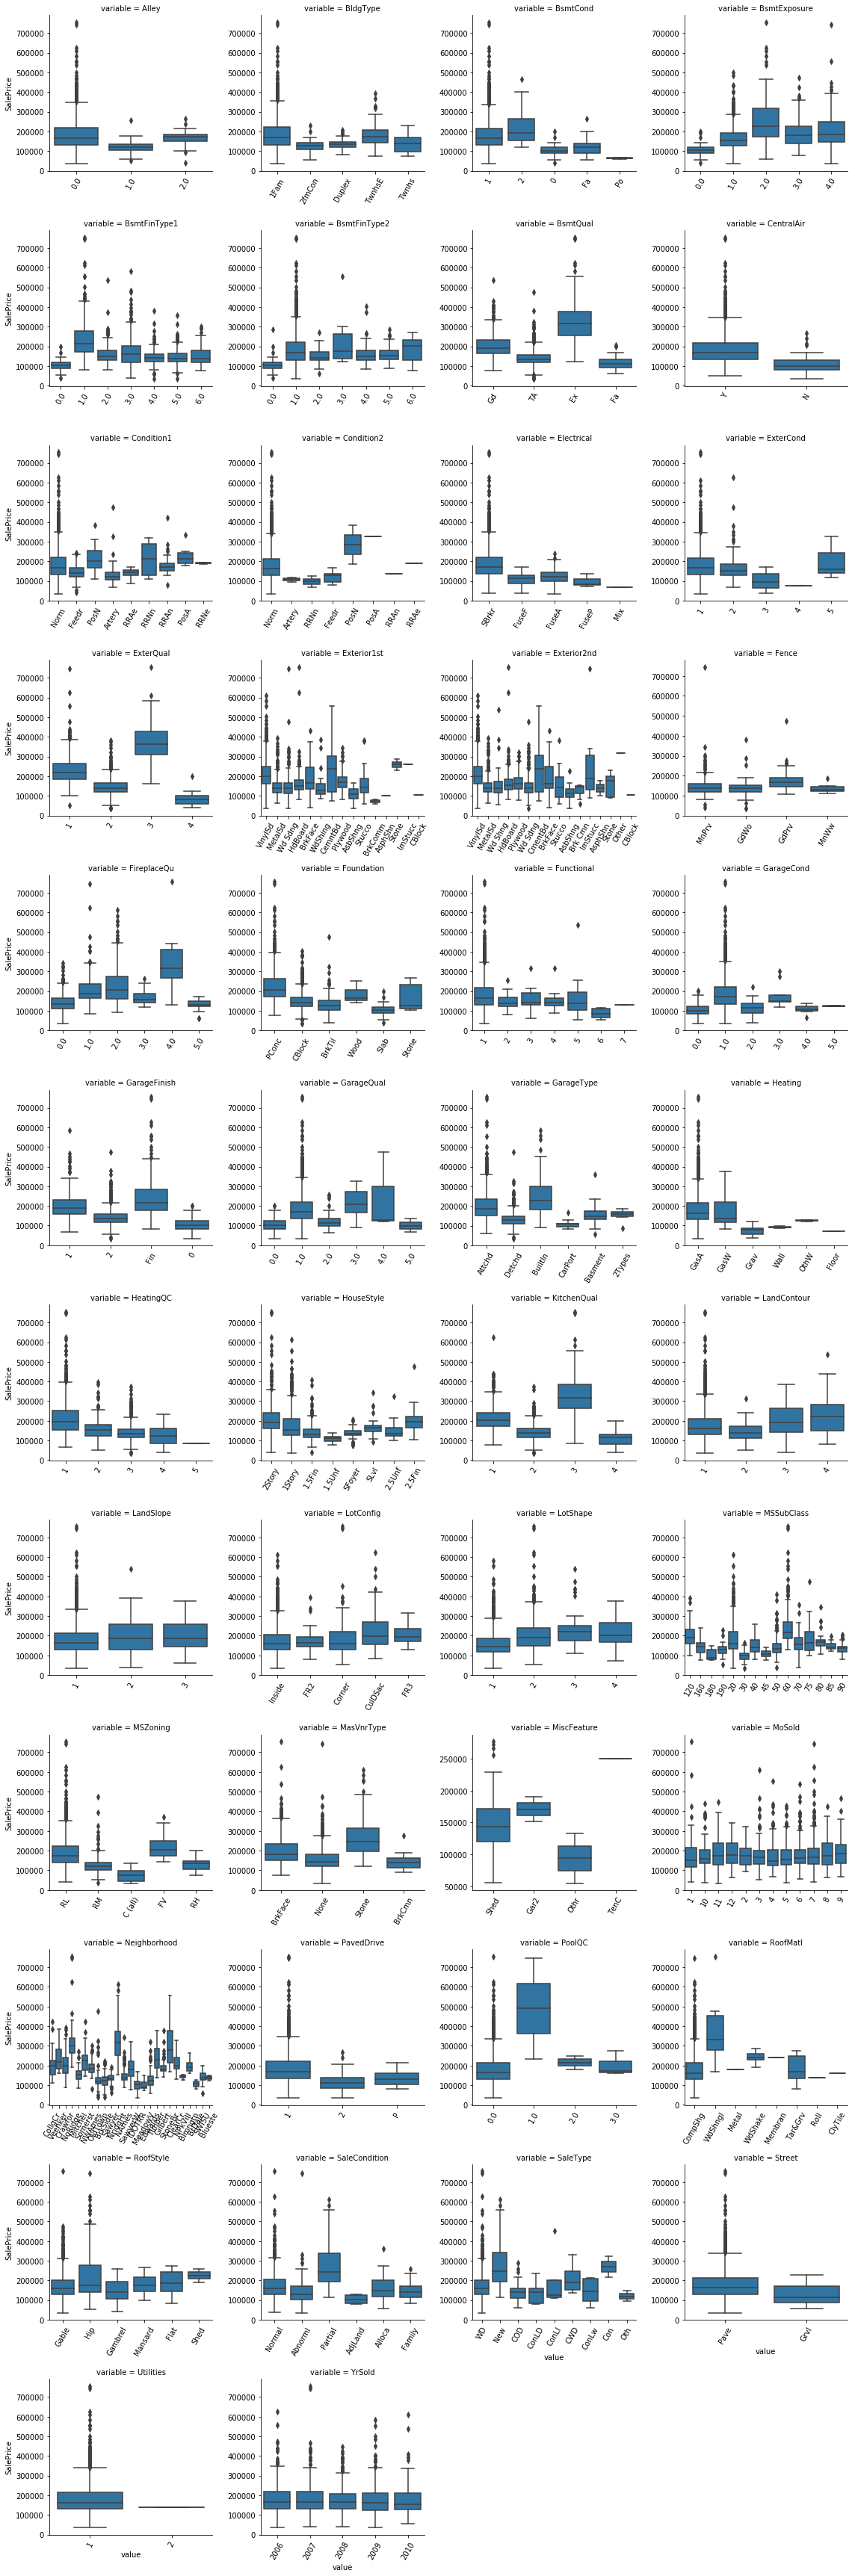

In [35]:
f=pd.melt(df_train,id_vars=['SalePrice'],value_vars=sorted(categorical_data))
g=sb.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False,size=4)
plt.xticks(rotation='vertical')
g=g.map(sb.boxplot,'value','SalePrice')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [36]:
#observing the boxplot, where there is a huge difference in means in each categorical values they are contributing more to the predicting Saleprice.

In [37]:
#using ALOHA

In [38]:
import scipy.stats
cat_features=categorical_data.columns
df_train[cat_features]=df_train[cat_features].fillna('Missing')
anova={'feature':[],'f':[],'p':[]}
for cat in cat_features:
    group_prices=[]
    for group in df_train[cat].unique():
        group_prices.append(df_train[df_train[cat]==group]['SalePrice'].values)
        f,p=scipy.stats.f_oneway(*group_prices)
        anova['feature'].append(cat)
        anova['f'].append(f)
        anova['p'].append(p)
anova=pd.DataFrame(anova)
anova=anova[['feature','f','p']]
anova.sort_values('p',inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:2931: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / float(dfbn)


In [39]:
anova

,feature,f,p
66,Neighborhood,74.804000,4.989576e-226
67,Neighborhood,71.784865,1.558600e-225
65,Neighborhood,76.789883,1.501410e-222
64,Neighborhood,78.109822,9.128586e-218
63,Neighborhood,81.320342,2.164068e-216
62,Neighborhood,84.869669,1.996264e-215
61,Neighborhood,88.820157,1.592067e-213
60,Neighborhood,91.209197,2.185652e-208
151,ExterQual,443.334831,1.439551e-204
150,ExterQual,643.516965,1.642153e-200


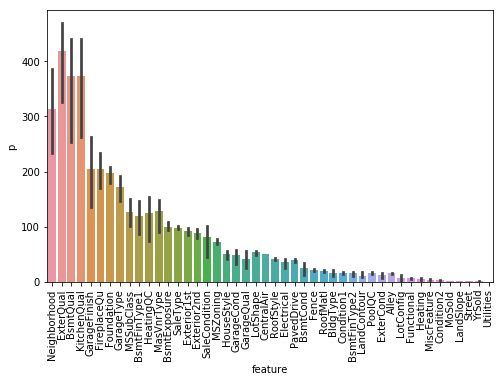

In [40]:
plt.figure(figsize=(8,5))
sb.barplot(anova.feature,np.log(1./anova['p']))
plt.xticks(rotation=90)
plt.show()

In [41]:
missing_values=(df_train[cat_features]=='Missing').sum().sort_values(ascending=False)
missing_values[missing_values>0]

MiscFeature    1406
Fence          1179
GarageType       81
BsmtQual         37
MasVnrType        8
Electrical        1
dtype: int64

In [42]:
df_train.loc[df_train.Electrical=='Missing','Electrical']=df_train.Electrical.mode()[0]

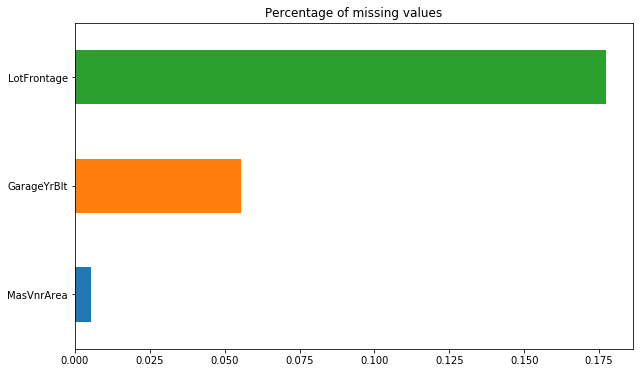

In [43]:
missing_data=df_train.isnull().sum()/df_train.shape[0]
missing_data[missing_data>0].sort_values(ascending=True).plot(kind='barh',figsize=(10,6))
plt.title('Percentage of missing values')
plt.show()

In [44]:
df_train.LotFrontage=df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_train.GarageYrBlt.fillna(0,inplace=True)
df_train.MasVnrArea.fillna(0,inplace=True)

#LotFrontage(how can there be no street in front of the lot) hence we replace it with the median value
#GarageYrBlt we can give 0 to the missing values
#same for MasVnrArea

In [45]:
#lets closely look into the MasVnrType field here
df_train.MasVnrType.replace({'Missing':'None'},inplace=True)
# now we are going to replace them with mean value

df_train.loc[(df_train.MasVnrType=='None')& (df_train.MasVnrArea >1),'MasVnrType']='BrkFace' #most common
df_train.loc[(df_train.MasVnrType=='None')&(df_train.MasVnrArea ==1),'MasVnrArea']= 0 # 1 Sq feet is equal to 0

for vnr_type in df_train.MasVnrType.unique():
    # so here we set the area equal to the mean of the given veneer type
    df_train.loc[(df_train.MasVnrType==vnr_type) & (df_train.MasVnrArea==0),'MasVnrArea']=df_train[df_train.MasVnrType==vnr_type].MasVnrArea.mean()

In [46]:
missing_data=df_train.isnull().sum()/df_train.shape[0]
missing_data

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
                ... 
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

In [47]:
#now lets find out whether they are having duplicates
print('Train data duplicates {}'.format(df_train.duplicated('Id').sum()))
print('Test data duplicates {}'.format(df_test.duplicated('Id').sum()))

Train data duplicates 0
Test data duplicates 0


In [48]:
#we are not having any duplicates if so simply drop the duplicated columns

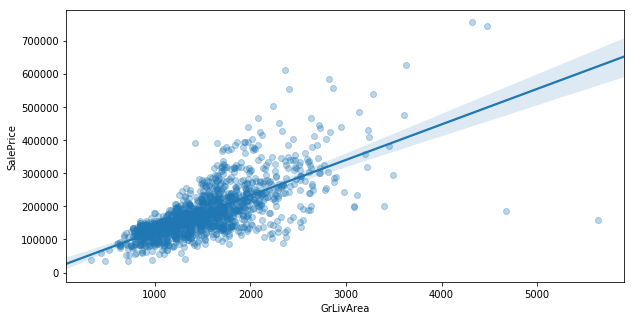

In [49]:
plt.figure(figsize=(10,5))
sb.regplot(df_train.GrLivArea,df_train.SalePrice,scatter_kws={'alpha':0.3})
plt.show()

In [50]:
#clearly see the area greater than 4000 are outliers

In [51]:
df_train.drop(df_train[df_train.GrLivArea>=4000].index,inplace=True)

In [52]:
#now we are moving towards the feature engineering

# calculating total square feet(area)

In [53]:
df_train['TotalSF']=df_train.TotalBsmtSF+df_train.GrLivArea
df_train['TotalFloorSF']=df_train['1stFlrSF']+df_train['2ndFlrSF']
df_train['TotalPorchSF']=df_train.OpenPorchSF+df_train.EnclosedPorch+df_train['3SsnPorch']+df_train['ScreenPorch']

In [54]:
#now lets create some boolean features

In [55]:
df_train['HasBasement']=df_train.TotalBsmtSF.apply(lambda x: 1 if x>0 else 0)
df_train['HasGarage']=df_train.GarageArea.apply(lambda x: 1 if x>0 else 0)
df_train['HasPorch']=df_train.TotalPorchSF.apply(lambda x: 1 if x>0 else 0)
df_train['HasPool']=df_train.PoolArea.apply(lambda x: 1 if x>0 else 0)
df_train['WasRemodeled']=df_train.YearRemodAdd!=df_train.YearBuilt.astype(np.int64)
df_train['IsNew']=(df_train.YearBuilt>2000).astype(np.int64)
df_train['WasCompleted']=(df_train.SaleCondition !='Partial').astype(np.int64)

In [56]:
boolean_features=['HasBasement','HasGarage','HasPorch','HasPool','WasRemodeled','IsNew','WasCompleted']

In [57]:
numeric_data=df_train.select_dtypes(include=[np.number])
categorical_data=df_train.select_dtypes(exclude=[np.number])
print(numeric_data.shape[1])
print(categorical_data.shape[1])
num_feature=numeric_data.columns
cat_feature=categorical_data.columns

61
30


In [58]:
# we have to separeate numerical and boolean
num_feature=[f for f in num_feature if f not in boolean_features]

In [59]:
#agin create a new feature total bathrooms

In [60]:
df_train['TotalBathrooms']=df_train.FullBath+.5*df_train.HalfBath+df_train.BsmtFullBath+.5*df_train.BsmtHalfBath

In [61]:
numeric_data=df_train.select_dtypes(include=[np.number])
categorical_data=df_train.select_dtypes(exclude=[np.number])
print(numeric_data.shape[1])
print(categorical_data.shape[1])
num_feature=numeric_data.columns
cat_feature=categorical_data.columns
num_feature=[f for f in num_feature if f not in boolean_features]

62
30


In [62]:
#applying log to some features because of their skewness

In [63]:
features=num_feature+['SalePrice']
for f in features:
    df_train.loc[:,f]=np.log1p(df_train[f])

In [64]:
y=df_train['SalePrice']
df_train.drop('SalePrice',axis=1,inplace=True)
df_train.drop('Id',axis=1,inplace=True)

#Get dummies one-hot encoding model
model_data=pd.get_dummies(df_train).copy()

In [65]:
model_data.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,0.0,0.693147,0.693147,0.693147,0.693147,2.079442,1.791759,7.602900,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,0.0,0.693147,0.693147,0.693147,0.693147,1.945910,2.197225,7.589336,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,0.0,1.098612,0.693147,0.693147,0.693147,2.079442,1.791759,7.601902,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,0.0,1.098612,0.693147,0.693147,0.693147,2.079442,1.791759,7.557995,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,0.0,1.098612,0.693147,0.693147,0.693147,2.197225,1.791759,7.601402,...,0,0,0,1,0,0,0,0,1,0


In [66]:
# spliting our data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(model_data.copy(),y,test_size=0.3,random_state=1)
print('Shapes')
print('X_train:',X_train.shape)
print('X_val:',X_test.shape)
print('y_train:',y_train.shape)
print('y_val:',y_test.shape)

Shapes
X_train: (1019, 276)
X_val: (437, 276)
y_train: (1019,)
y_val: (437,)


In [69]:
from sklearn.preprocessing import RobustScaler,StandardScaler
#remove Id and SalePrice from num_features
num_feature.remove('Id')
num_feature.remove('SalePrice')

# feature mean to be 0 with std deviation is 1 
stdsc=StandardScaler()
X_train.loc[:,num_feature]=stdsc.fit_transform(X_train[num_feature])
X_test.loc[:,num_feature]=stdsc.transform(X_test[num_feature])

In [70]:
from sklearn.model_selection import cross_val_score

def rsme(model,X,y):
    cv_scores= -cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=10)
    return np.sqrt(cv_scores)

In [71]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid={'alpha': [0.0001,0.001,0.01,1.,5.,10.,25.],'max_iter':[50000]}
lasso=GridSearchCV(Lasso(),cv=5,param_grid=param_grid,scoring='neg_mean_squared_error')
lasso.fit(X_train,y_train)
alpha=lasso.best_params_['alpha']

#Hone in

param_grid={'alpha':[x/100. *alpha for x in range(50,150,5)],'max_iter':[50000]}
lasso=GridSearchCV(Lasso(),cv=5,param_grid=param_grid,scoring='neg_mean_squared_error')
lasso.fit(X_train,y_train)
alpha=lasso.best_params_['alpha']
lasso=lasso.best_estimator_

print('Lasso->Train RSME: {:.5f} | Test RSME: {:.5f} | alpha: {:.5f}'.format(rsme(lasso,X_train,y_train).mean(),rsme(lasso,X_test,y_test).mean(),alpha))


Lasso->Train RSME: 0.00813 | Test RSME: 0.01102 | alpha: 0.00005


In [72]:
# train rsme and test rsme are somewhat similar its kind of overfitting so lets fix it

LASSO dropped 169 of 276 features.


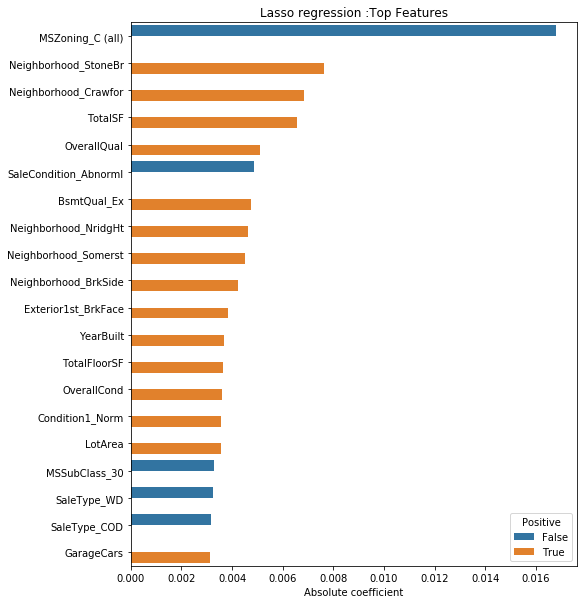

In [73]:
import seaborn as sns
coefs=pd.DataFrame({'coefs':lasso.coef_,'Positive':lasso.coef_ >0},index=X_train.columns)
coefs['coefs_abs']=np.abs(coefs.coefs)
print('LASSO dropped {} of {} features.'.format(sum(coefs.coefs==0),coefs.shape[0]))

top_coefs=coefs.sort_values('coefs_abs',ascending=False).head(20)
plt.figure(figsize=(8,10))
sns.barplot(top_coefs.coefs_abs,top_coefs.index,orient='h',hue=top_coefs.Positive)
plt.title('Lasso regression :Top Features')
plt.xlabel('Absolute coefficient')
plt.show()

In [74]:
#now lets finally train our model

In [75]:
#conda install -c conda-forge xgboost

SyntaxError: invalid syntax (<ipython-input-75-cc3c3031b539>, line 1)

In [76]:
import sys
!{sys.executable} -m pip install xgboost

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 21.1.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [77]:
import xgboost as xgb
regr=xgb.XGBRegressor(colsample_bytree=0.2,
                     gamma=0.0,
                     learning_rate=0.05,
                     max_depth=6,
                     min_child_weight=1.5,
                     n_estimators=7200,
                     reg_alpha=0.9,
                     reg_lambda=0.6,
                     subsample=0.2,
                     seed=42,
                     silent=1)

regr.fit(X_train[top_coefs.index],y_train)

[11:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2, gamma=0.0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1.5, missing=nan, monotone_constraints='()',
       n_estimators=7200, n_jobs=4, num_parallel_tree=1,
       objective='reg:squarederror', random_state=42, reg_alpha=0.9,
       reg_lambda=0.6, scale_pos_weight=1, seed=42, silent=1,
       subsample=0.2, tree_method='exact', validate_parameters=1,
       verbosity=None)

In [78]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

# prediction on training set

y_pred=regr.predict(X_test[top_coefs.index])

print("XGBoost score on training set:",rmse(y_test,y_pred))


XGBoost score on training set: 0.016411481031820285


In [79]:
#final_score